## Import the necessary packages to load, analyze, and visualize the data

In [24]:
import pandas as pd # data processing

# Visulization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import wordcloud as WordCloud

### Load the Two Datasets


In [25]:
true = pd.read_csv("../data/raw/true.csv")
fake = pd.read_csv("../data/raw/fake.csv")

# Analyze True Dataset

In [26]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [27]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [28]:
true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [29]:
true_subject_counts = true.subject.value_counts()
print(true_subject_counts)

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64


# Analyze Fake Dataset

In [30]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [31]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [32]:
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [33]:
fake_subject_counts = fake.subject.value_counts()
print(fake_subject_counts)

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


## Create functions to visualize the data

In [34]:
def create_bar_chart(df: pd.DataFrame):
    plt.figure(figsize=(10,6))
    sns.countplot(x="subject", hue="subject", data=df, order=df.subject.unique(), palette="Set1", legend=False)
    plt.show()

In [35]:
def create_pie_chart(data_counts: pd.Series, title: str):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.pie(data_counts, labels=data_counts.index, autopct="%1.1f%%", textprops={"fontsize": 12}, colors=sns.color_palette("Set1"))
    plt.title(f"{title} News Subjects")
    plt.show()

In [36]:
def create_wordcloud(df: pd.DataFrame, column: str, title: str) -> None:
    text = ' '.join(df[column])
    wc = WordCloud.WordCloud(width=3000, height=2000, background_color='black',  max_words=100,
                          colormap='Set2', collocations=False).generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Word Cloud for the {column.capitalize()} column in {title.capitalize()} dataset', fontsize=16, color='black')
    plt.axis('off')
    plt.show()

# Visualizing the Datasets

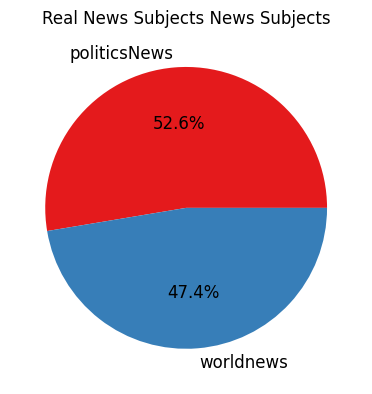

In [37]:
create_pie_chart(true_subject_counts, "Real News Subjects")

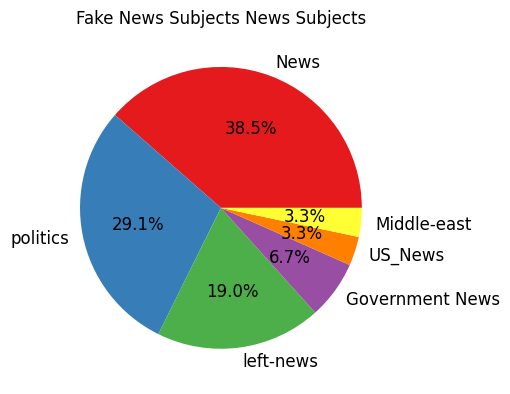

In [38]:
create_pie_chart(fake_subject_counts, "Fake News Subjects")

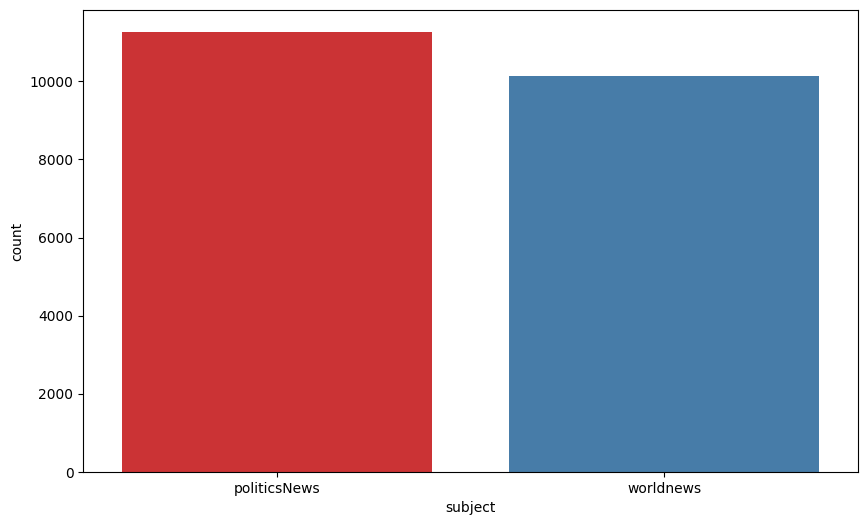

In [39]:
create_bar_chart(true)

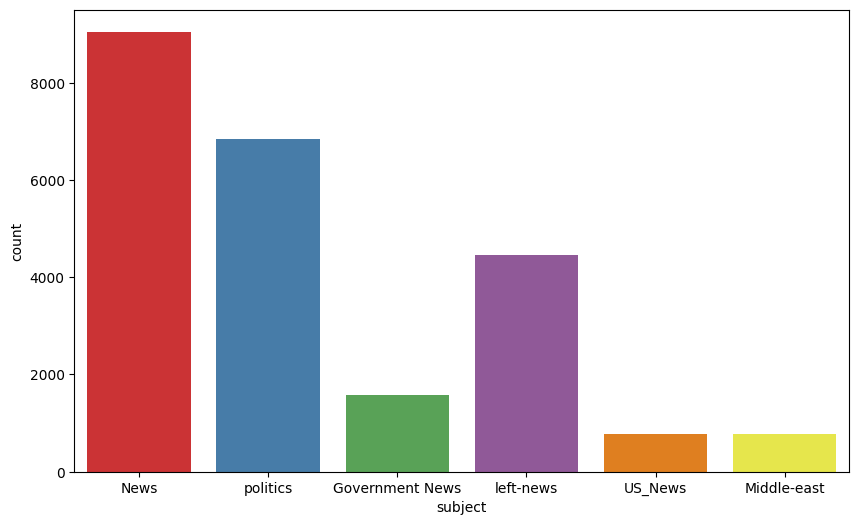

In [40]:
create_bar_chart(fake)

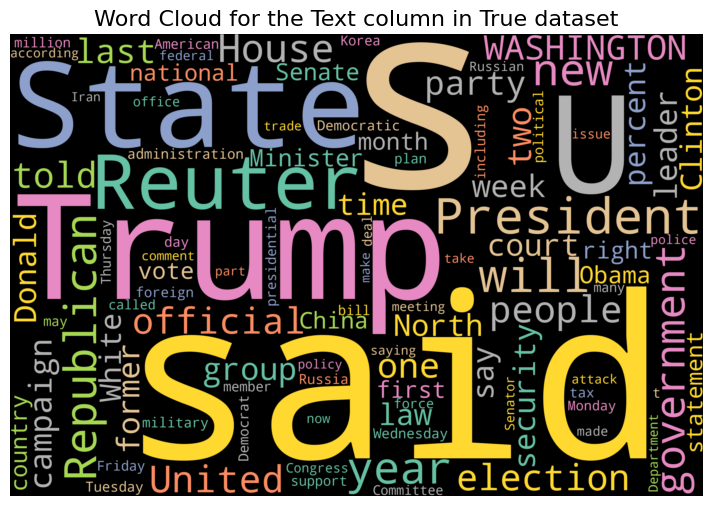

In [41]:
create_wordcloud(true, "text", "True")

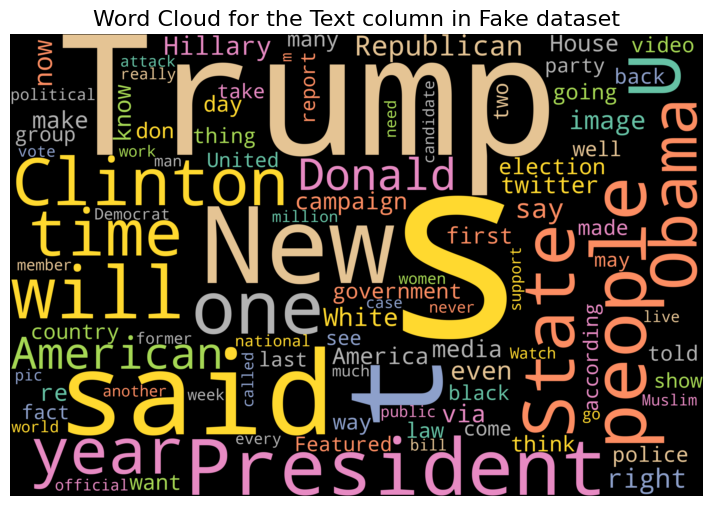

In [ ]:
create_wordcloud(fake, "text", "Fake") 